<a href="https://colab.research.google.com/github/Skommireddy/Projects-IDS/blob/main/HW6/Problem2R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The %load_ext magic command loads the rpy2 IPython extension into the notebook, essentially initializing the R interface and allowing the notebook to connect and pass objects between the two languages.

In [104]:
# Start rmagic to mix Python and R code sells
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


Importing csv file from Github repositiory HW6 folder.
Printing the imported data set Loans_TrainingDF with five columns Approval, Debt-to-Income Ratio, FICO Score, Request Amount and Interest and LoanS_TestDF

In [105]:
# Let's read in the data file
%%R
# used to read csv files
library(readr)
# importing the data file from Github Repo.
Loans_TrainingDF <- read_csv("https://raw.githubusercontent.com/Skommireddy/Projects-IDS/main/HW6/Loans_Training.csv", show_col_types = FALSE)
Loans_TestDF <- read_csv("https://raw.githubusercontent.com/Skommireddy/Projects-IDS/main/HW6/Loans_Test.csv", show_col_types = FALSE)
# printing the train data frame
Loans_TrainingDF


# A tibble: 150,302 × 5
   Approval `Debt-to-Income_Ratio` FICO_Score Request_Amount Interest
   <lgl>                     <dbl>      <dbl>          <dbl>    <dbl>
 1 FALSE                         0        397           1000      450
 2 FALSE                         0        403            500      225
 3 FALSE                         0        408           1000      450
 4 FALSE                         0        408           2000      900
 5 FALSE                         0        411           5000     2250
 6 FALSE                         0        413           5000     2250
 7 FALSE                         0        416           6000     2700
 8 FALSE                         0        421           2000      900
 9 FALSE                         0        422          12000     5400
10 FALSE                         0        432          10000     4500
# … with 150,292 more rows


In [106]:
# printing the test data frame
%%R
Loans_TestDF

# A tibble: 49,698 × 5
   Approval `Debt-to-Income_Ratio` FICO_Score Request_Amount Interest
   <lgl>                     <dbl>      <dbl>          <dbl>    <dbl>
 1 FALSE                         0        413           2000      900
 2 FALSE                         0        449           1000      450
 3 FALSE                         0        454           6000     2700
 4 FALSE                         0        456           1000      450
 5 FALSE                         0        457           1000      450
 6 FALSE                         0        457           8000     3600
 7 FALSE                         0        459           8000     3600
 8 FALSE                         0        461            500      225
 9 FALSE                         0        461           6000     2700
10 FALSE                         0        462          19000     8550
# … with 49,688 more rows


In [107]:
# printing head of Loans_TrainingDF
%%R
head(Loans_TrainingDF)

# A tibble: 6 × 5
  Approval `Debt-to-Income_Ratio` FICO_Score Request_Amount Interest
  <lgl>                     <dbl>      <dbl>          <dbl>    <dbl>
1 FALSE                         0        397           1000      450
2 FALSE                         0        403            500      225
3 FALSE                         0        408           1000      450
4 FALSE                         0        408           2000      900
5 FALSE                         0        411           5000     2250
6 FALSE                         0        413           5000     2250


In [108]:
# printing head of Loans_TestDF
%%R
head(Loans_TestDF)

# A tibble: 6 × 5
  Approval `Debt-to-Income_Ratio` FICO_Score Request_Amount Interest
  <lgl>                     <dbl>      <dbl>          <dbl>    <dbl>
1 FALSE                         0        413           2000      900
2 FALSE                         0        449           1000      450
3 FALSE                         0        454           6000     2700
4 FALSE                         0        456           1000      450
5 FALSE                         0        457           1000      450
6 FALSE                         0        457           8000     3600


In [109]:
#summary of Loans_TestDF
%%R
summary(Loans_TestDF)

  Approval       Debt-to-Income_Ratio   FICO_Score    Request_Amount 
 Mode :logical   Min.   :0.0000       Min.   :372.0   Min.   :  500  
 FALSE:24934     1st Qu.:0.0900       1st Qu.:647.0   1st Qu.: 6000  
 TRUE :24764     Median :0.1600       Median :684.0   Median :11000  
                 Mean   :0.1831       Mean   :672.3   Mean   :13413  
                 3rd Qu.:0.2400       3rd Qu.:714.0   3rd Qu.:19000  
                 Max.   :1.0500       Max.   :866.0   Max.   :42000  
    Interest    
 Min.   :  225  
 1st Qu.: 2700  
 Median : 4950  
 Mean   : 6036  
 3rd Qu.: 8550  
 Max.   :18900  


In [110]:
#summary of Loans_TrainingDF
%%R
summary(Loans_TrainingDF)

  Approval       Debt-to-Income_Ratio   FICO_Score  Request_Amount 
 Mode :logical   Min.   :0.0000       Min.   :371   Min.   :  500  
 FALSE:75066     1st Qu.:0.0900       1st Qu.:647   1st Qu.: 6000  
 TRUE :75236     Median :0.1600       Median :684   Median :11000  
                 Mean   :0.1835       Mean   :672   Mean   :13427  
                 3rd Qu.:0.2400       3rd Qu.:714   3rd Qu.:19000  
                 Max.   :1.0300       Max.   :869   Max.   :44000  
    Interest    
 Min.   :  225  
 1st Qu.: 2700  
 Median : 4950  
 Mean   : 6042  
 3rd Qu.: 8550  
 Max.   :19800  


str() of Loans_TrainingDF and Loans_TestDF to display the internal structure of Train and Test data

In [111]:
#str() Loans_TrainingDF
%%R
str(Loans_TrainingDF)

spec_tbl_df [150,302 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Approval            : logi [1:150302] FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Debt-to-Income_Ratio: num [1:150302] 0 0 0 0 0 0 0 0 0 0 ...
 $ FICO_Score          : num [1:150302] 397 403 408 408 411 413 416 421 422 432 ...
 $ Request_Amount      : num [1:150302] 1000 500 1000 2000 5000 5000 6000 2000 12000 10000 ...
 $ Interest            : num [1:150302] 450 225 450 900 2250 2250 2700 900 5400 4500 ...
 - attr(*, "spec")=
  .. cols(
  ..   Approval = col_logical(),
  ..   `Debt-to-Income_Ratio` = col_double(),
  ..   FICO_Score = col_double(),
  ..   Request_Amount = col_double(),
  ..   Interest = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [112]:
#str() Loans_TestDF
%%R
str(Loans_TestDF)

spec_tbl_df [49,698 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Approval            : logi [1:49698] FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Debt-to-Income_Ratio: num [1:49698] 0 0 0 0 0 0 0 0 0 0 ...
 $ FICO_Score          : num [1:49698] 413 449 454 456 457 457 459 461 461 462 ...
 $ Request_Amount      : num [1:49698] 2000 1000 6000 1000 1000 8000 8000 500 6000 19000 ...
 $ Interest            : num [1:49698] 900 450 2700 450 450 3600 3600 225 2700 8550 ...
 - attr(*, "spec")=
  .. cols(
  ..   Approval = col_logical(),
  ..   `Debt-to-Income_Ratio` = col_double(),
  ..   FICO_Score = col_double(),
  ..   Request_Amount = col_double(),
  ..   Interest = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


# Check for Missing Values
*   Determine if there are any missing values
*   If so, decide on the method of imputation, e.g., mean, median, most_frequent

In [113]:
#checking missing values in Loans_TrainingDF
%%R
sum(is.na(Loans_TrainingDF))

[1] 0


In [114]:
#checking missing values in Loans_TestDF
%%R
sum(is.na(Loans_TestDF))

[1] 0


There are 0 missing values in Loans_TrainingDF and Loans_TestDF dataframe.

The prop. table() function in R can be used to calculate the value of each cell in a table as a proportion of all values.

In [115]:
#prop.table() for Loans_TrainingDF
%%R
prop.table(table(Loans_TrainingDF$Approval))


    FALSE      TRUE 
0.4994345 0.5005655 


In [116]:
#prop.table() for Loans_TestDF
%%R
prop.table(table(Loans_TestDF$Approval))


    FALSE      TRUE 
0.5017103 0.4982897 


# Installing Packages
1.   C5.0 decision trees and rule-based models for pattern recognition that extend the work of Quinlan.
2.   rplot function combines and extends plot. rpart and text. rpart in the rpart package. It automatically scales and adjusts the displayed tree for best fit.
3.   party: A Laboratory for Recursive Partytioning.
4.   The caret package (Classification And REgression Training) contains functions to streamline the model training process for complex regression and classification problems.



In [117]:
# Installing packages
%%R
install.packages('C50')
install.packages('rpart.plot')
install.packages('party')
install.packages("caret")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/C50_0.1.6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 305528 bytes (298 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to

In [118]:
#Importing libraries
%%R
library(C50)
library(rpart.plot)
library(party)
library(caret)

Create a CART model using the training data set that predicts Approval using Debt-to-Income Ratio, FICO Score, etc. Visualize the decision tree and Describe the first few splits in the decision tree.

In [119]:
#cart model for Loans_TrainingDF
%%R
set.seed(120)
CART_model <- rpart(Approval ~., data = Loans_TrainingDF, method = "class")
CART_model

n= 150302 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150302 75066 TRUE (0.49943447 0.50056553)  
  2) FICO_Score< 659.5 46002  1808 FALSE (0.96069736 0.03930264) *
  3) FICO_Score>=659.5 104300 30872 TRUE (0.29599233 0.70400767)  
    6) Debt-to-Income_Ratio>=0.305 12873  1679 FALSE (0.86957197 0.13042803) *
    7) Debt-to-Income_Ratio< 0.305 91427 19678 TRUE (0.21523182 0.78476818) *


From the above Cart Model,

* If FICO score is greater than or equal to 659.5 and Debt-to-Income Ratio is more than 0.305, loan with be accepted.
* If FICO score is greater than 659.5 and Debt-to-Income Ratio is less than 0.305 loan will be denied.
* If FICO score is less than 659.5, loan will be denied.


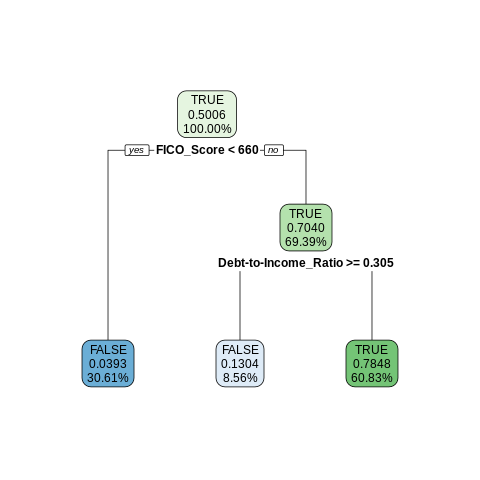

In [120]:
# Ploting the decision trees
%%R
rpart.plot(CART_model, digits = 4)

From the above decision tree,

*   Each node tells us the proportion of FICO Score and Debt-to-Income Ratio, along with the percentage of the records reaching that node.  
 
*   At the root node split, CART identifies the most efficacious possible binary split as separating the records into two groups, depending on their value for the variable FICO Score, one group whose FICO Score < 660, and the other group consisting of FICO Score > 660.
 
*   CART makes a second split, based on the variable, Debt-to-Income Ratio. However, this group of records representing FICO Score with less score than 600 as shown in the leaf node in the lower right with 0.7040 with 69.39%. On the other hand, those who have FICO Score > 660 is 0.0393 containing 30.61% 
 
*   The two nodes in the lower right are leaf nodes with Debt-to-Income Ratio of 0.305. If the value is greater than or equal to 0.305 it is true with 0.7848 and 60.83% and if it is less than 0.305 it is false with 0.1304 and 8.56%.

Prediction of CART model and Loans_TestDF

In [121]:
#prediction on Loans_TestDF and CART model
%%R
predict_CART <- predict(CART_model, Loans_TestDF, 'class')
head(predict_CART)

    1     2     3     4     5     6 
FALSE FALSE FALSE FALSE FALSE FALSE 
Levels: FALSE TRUE


Confusion Matrix of Loans_TestDF and predict_CART.


> A summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. 



In [122]:
#confusion matrix of Loans_TestDF and predict_CART
%%R
confusionMatrix(table(Loans_TestDF$Approval, predict_CART))

Confusion Matrix and Statistics

       predict_CART
        FALSE  TRUE
  FALSE 18314  6620
  TRUE   1171 23593
                                        
               Accuracy : 0.8432        
                 95% CI : (0.84, 0.8464)
    No Information Rate : 0.6079        
    P-Value [Acc > NIR] : < 2.2e-16     
                                        
                  Kappa : 0.6867        
                                        
 Mcnemar's Test P-Value : < 2.2e-16     
                                        
            Sensitivity : 0.9399        
            Specificity : 0.7809        
         Pos Pred Value : 0.7345        
         Neg Pred Value : 0.9527        
             Prevalence : 0.3921        
         Detection Rate : 0.3685        
   Detection Prevalence : 0.5017        
      Balanced Accuracy : 0.8604        
                                        
       'Positive' Class : FALSE         
                                        


Accuracy of CART model

In [123]:
#accuarcy of cart model
%%R
accuracy_CART_model <- sum( predict_CART == Loans_TestDF$Approval)/ length(predict_CART)
print('CART Model accuracy :')
accuracy_CART_model * 100

[1] "CART Model accuracy :"
[1] 84.32331


In [124]:
%%R
Loans_TrainingDF$Approval = as.factor(Loans_TrainingDF$Approval)
head(Loans_TrainingDF$Approval)

[1] FALSE FALSE FALSE FALSE FALSE FALSE
Levels: FALSE TRUE


Build a C5.0 model using the same predictors and target as in part 1.  This time, specify a minimum of 1000 cases per terminal node. Visualize the decision tree. Describe the first few splits in the decision tree.

In [125]:
#c5_model with a minimum of 1000 cases per terminal node.
%%R
c5_model =C5.0(Loans_TrainingDF[,-1], Loans_TrainingDF$Approval, control = C5.0Control(minCases=1000))
c5_model


Call:
C5.0.default(x = Loans_TrainingDF[, -1], y = Loans_TrainingDF$Approval,
 control = C5.0Control(minCases = 1000))

Classification Tree
Number of samples: 150302 
Number of predictors: 4 

Tree size: 8 

Non-standard options: attempt to group attributes, minimum number of cases: 1000



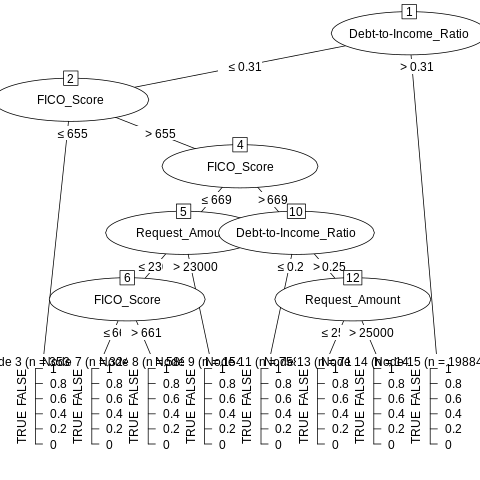

In [126]:
#plotting c5_model
%%R
plot(c5_model)

Prediction of c5 model and Loans_TestDF

In [127]:
#prediction of c5 model and Loans_TestDF
%%R
predict_c5 <- predict(c5_model, Loans_TestDF)
head(predict_c5)

[1] FALSE FALSE FALSE FALSE FALSE FALSE
Levels: FALSE TRUE


Confusion Matrix of Loans_TestDF and predict_c5

In [128]:
#confusion matrix of predict_c5 and Loans_TestDF
%%R
confusionMatrix(table(Loans_TestDF$Approval, predict_c5))

Confusion Matrix and Statistics

       predict_c5
        FALSE  TRUE
  FALSE 18842  6092
  TRUE   1504 23260
                                         
               Accuracy : 0.8472         
                 95% CI : (0.844, 0.8503)
    No Information Rate : 0.5906         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.6945         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.9261         
            Specificity : 0.7925         
         Pos Pred Value : 0.7557         
         Neg Pred Value : 0.9393         
             Prevalence : 0.4094         
         Detection Rate : 0.3791         
   Detection Prevalence : 0.5017         
      Balanced Accuracy : 0.8593         
                                         
       'Positive' Class : FALSE          
                                         


Accuracy of c5 model

In [129]:
#accuarcy of c5 model
%%R
accuracy_c5_model <- sum( predict_c5 == Loans_TestDF$Approval)/ length(predict_c5)
print('c5 Model accuracy :')
accuracy_c5_model * 100

[1] "c5 Model accuracy :"
[1] 84.71568


How does your C5.0 model compare to your CART model for the loans_training data? Describe the similarities and differences.

In [130]:
#plotting predict_CART accuracy and predict_c5 accuracy
%%R
labels <- c('CART', 'C5.0')
accuracy_model = c(accuracy_CART_model, accuracy_c5_model)

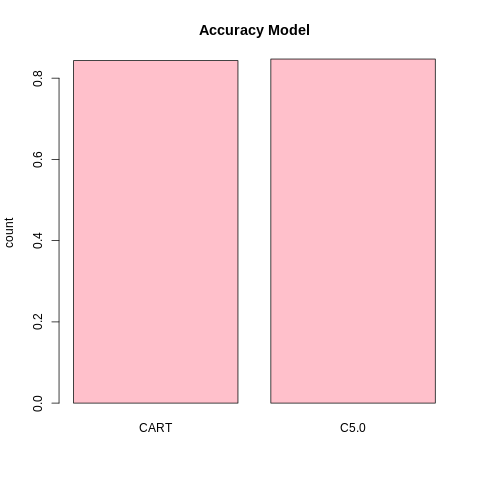

In [131]:
#barplot
%%R
barplot(accuracy_model, main = "Accuracy Model", ylab = "count", names.arg = labels, col="pink")

# Summary:


* From the decision tree plotted for the CART model, FICO score is made as the root node followed by Debt-to-Income Ratio node.
* In the c5 model decision tree, Debt-to-Income Ratio is made as the root node followed by FICO score and Request amount nodes.
*  The accuracy of CART model is 84.32331.
*  The accuracy of c5 Model is 84.71568.
*  From the above plotted graph both CART model and c5 Model is almost similar.




